# Importing Libraries

In [23]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(96, 96),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

# Loading Model

In [27]:
cnn = tf.keras.models.load_model('M:\\machineLearning\\Plant_Disease_Prediction\\trained_plant_disease_model_efficientnetv2b0_epoch1.keras')

#Visualising and Performing Prediction on Single image

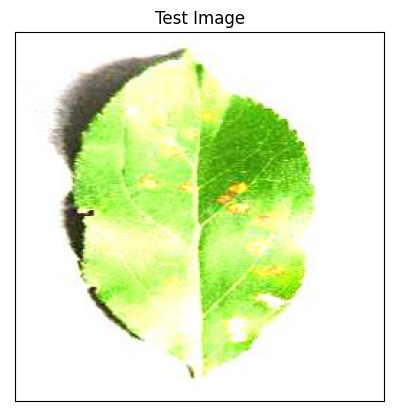

In [28]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [29]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(96,96))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 3s 3s/step


In [30]:
print(predictions)

[[0.01902476 0.00664381 0.09980032 0.03029191 0.01105372 0.0463118
  0.01253074 0.01648044 0.13079214 0.0162378  0.02710766 0.0101707
  0.00313    0.01364257 0.00678321 0.10812519 0.04476473 0.0131992
  0.01708296 0.13629873 0.00281011 0.00552247 0.0113435  0.00380891
  0.01410692 0.02804561 0.00542013 0.00595917 0.03176044 0.00219228
  0.01472913 0.00938856 0.02901043 0.0023561  0.0039719  0.04096052
  0.00488909 0.01425231]]


In [31]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

19


In [32]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'class_mode' is not defined